# Machine Learning Models and Performance

# Linear Regression

The goal of this project is to facilitate a deeper understanding of Machine Learning Models and the mathematics, and computer code that allow them to function. The models created from scratch will be compared to their counterparts in sci-kit learn. Accuracy and computational time will be the primary metrics used for comparison.

## $$\mathcal{L}(\beta) = \sum_{i=1}^n \epsilon_i^2 =  (y-X\beta)^T(y-X\beta)$$

In [1]:
from sklearn.datasets import make_regression
from IPython.display import Image

In [2]:
cd ..

/home/jovyan/cap


In [3]:
%run lib/imports.py
%matplotlib inline

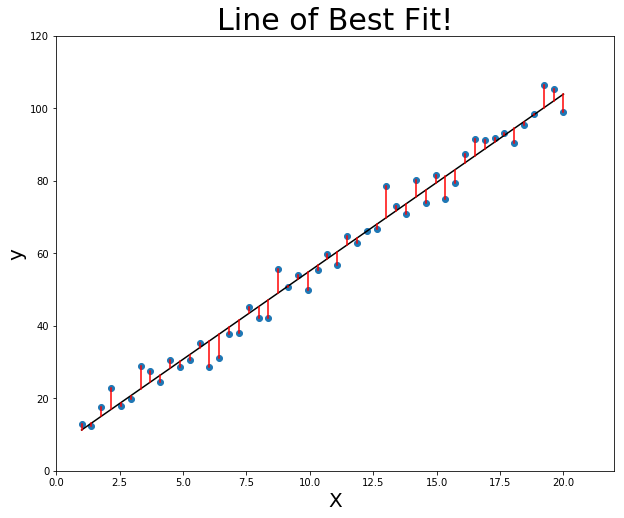

In [4]:
Image('lib/images/lob.png')

## Using make_regression to create a simple dataset to test the linear regression model on.

In [5]:
mr_X, mr_y = make_regression(n_samples=1000, n_features = 100, n_informative = 2, random_state = 0, noise = .5)

### Visualizing data

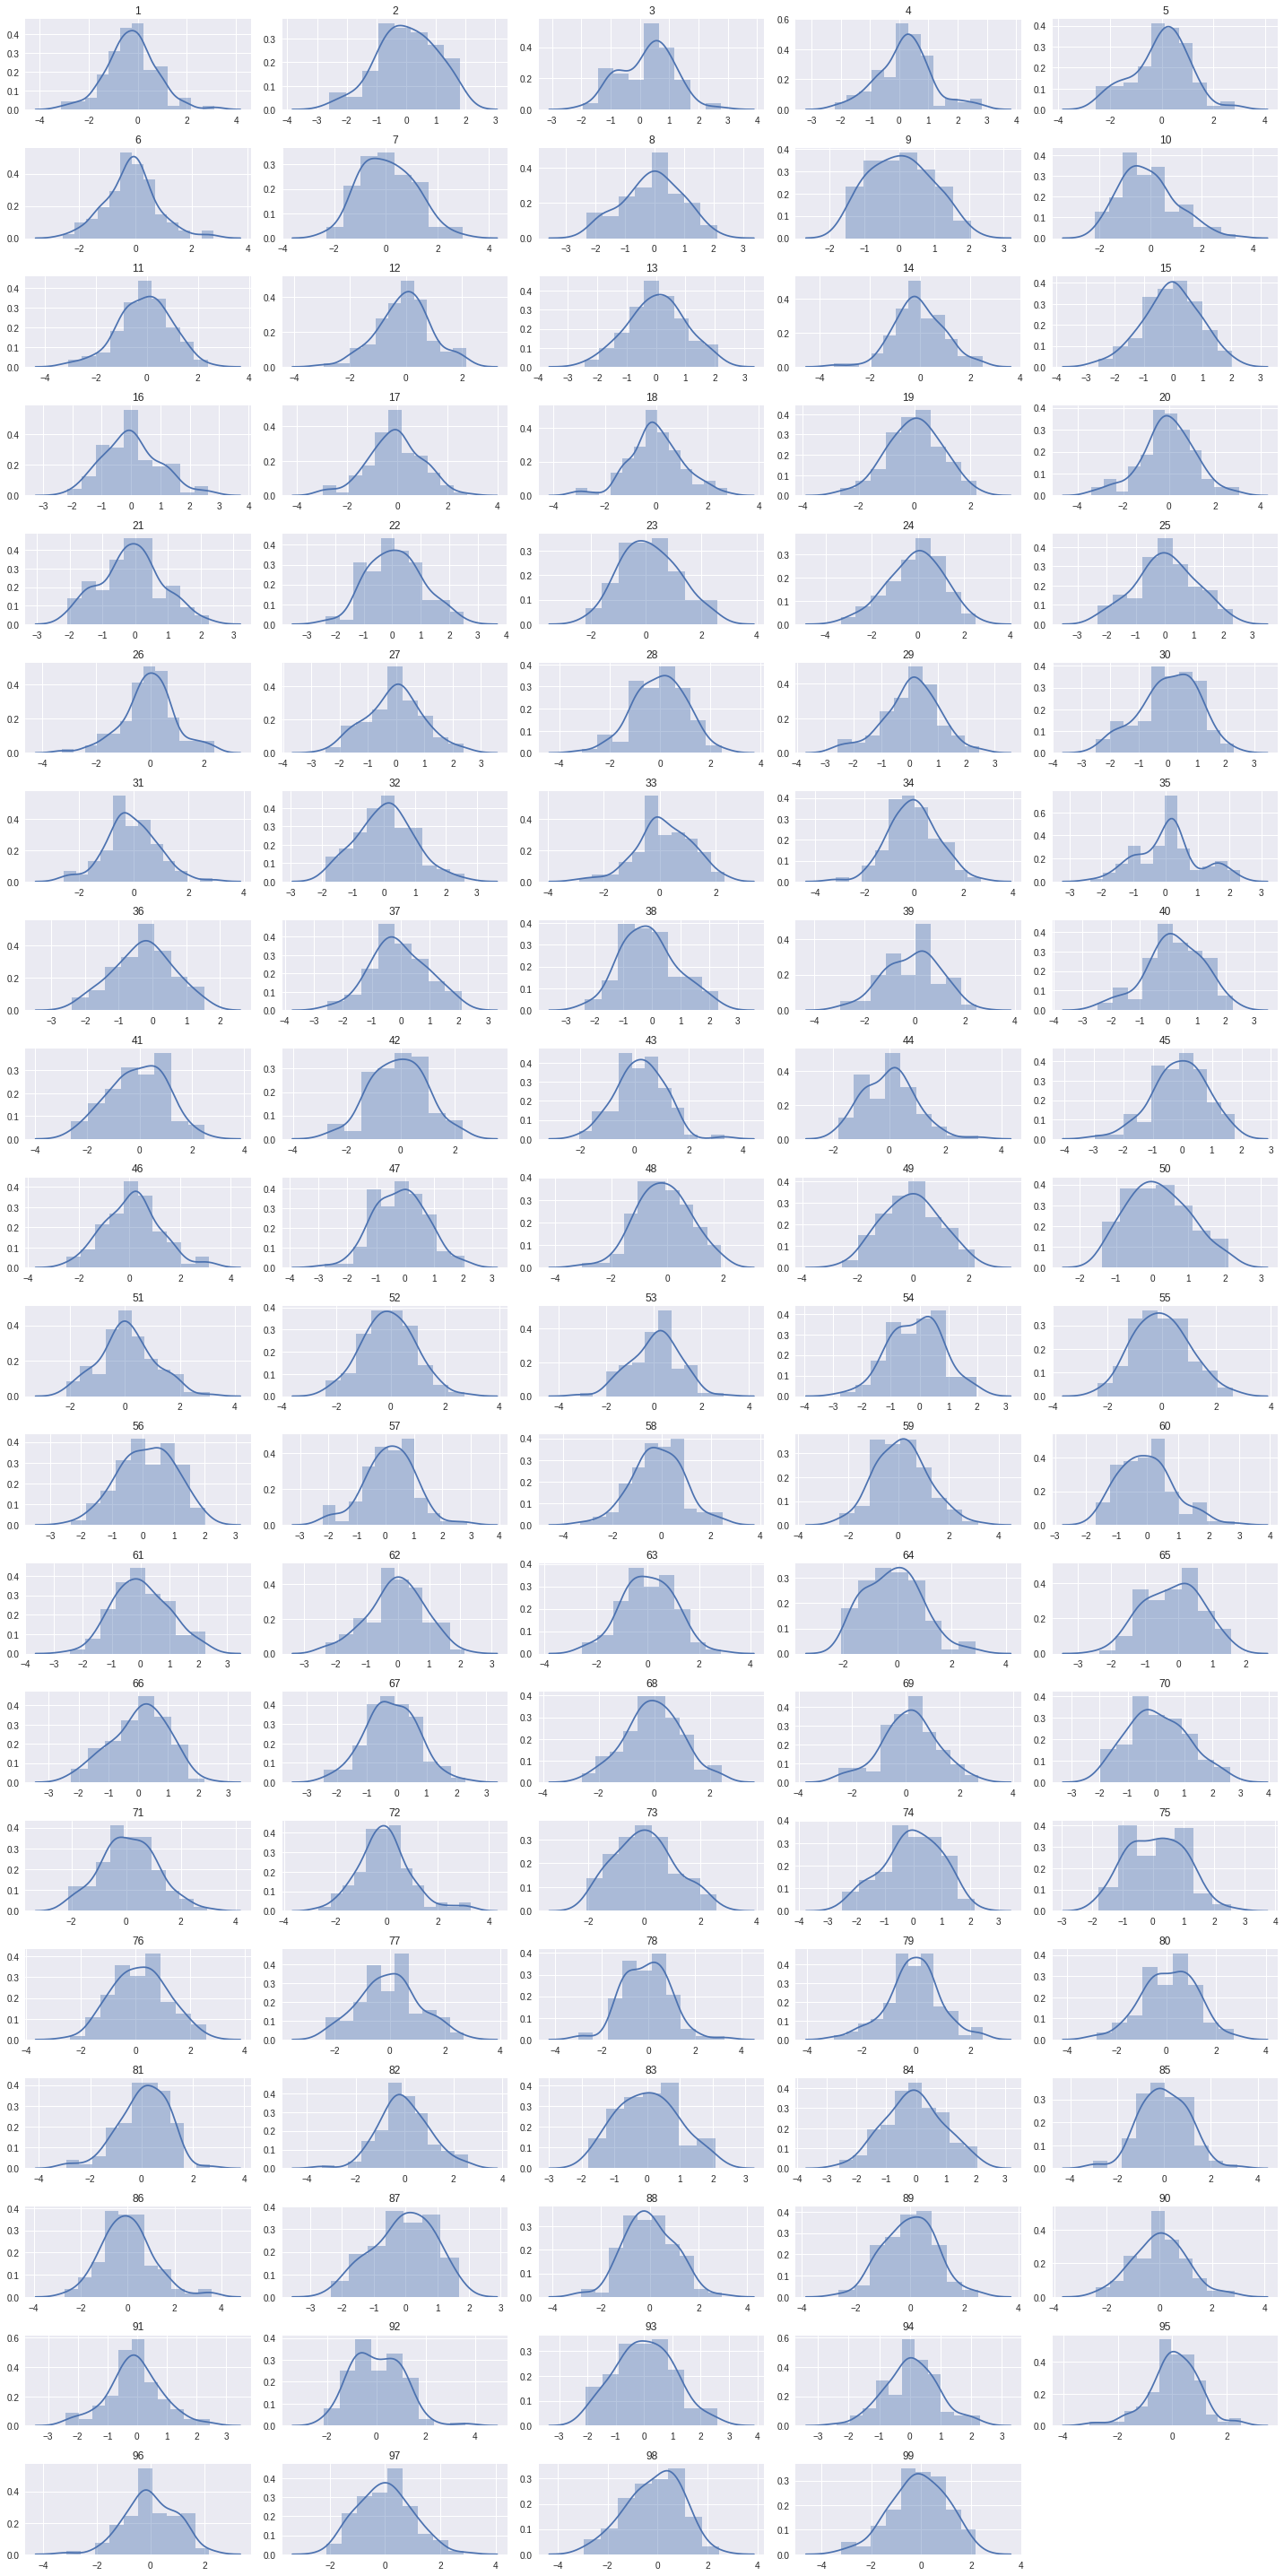

In [6]:
fig = plt.figure(figsize=(20,40))

for i in range(1, mr_X.shape[1]):
    
    fig.add_subplot(20,5,i)
    sns.distplot(mr_X[i])
    plt.title(i)
    plt.yscale('linear')
    
fig.tight_layout()

In [16]:
mr_X[0]

array([-0.21808911,  0.34742834,  0.21722748,  0.31459239, -0.82832238,
        0.8793066 , -0.91808284, -1.08422557,  0.27411103,  1.18672826,
        0.95604837,  0.41461637, -1.04096423, -0.76045841,  1.02894621,
       -0.6576403 , -0.31190378,  0.44681936, -0.77053569, -1.60118848,
        0.34632326,  0.2437317 ,  0.51420566, -1.37545676,  0.64718918,
        0.24012395,  1.39715873, -1.869076  , -0.2294373 , -0.43515184,
       -1.88340889, -1.84440942,  0.26852224,  0.78723209, -1.31048593,
       -0.66169423, -0.66542828,  0.32695414, -0.92667566,  0.12578133,
        1.48070684,  1.3277803 ,  1.1134512 ,  2.0729917 ,  1.08338971,
       -0.33968086, -1.31716206, -0.67714141, -0.5798116 ,  1.12467067,
       -1.17454022, -0.70625945,  1.1256504 , -0.7126177 ,  0.18912696,
       -1.32448292, -0.80814855, -1.42406695,  0.37207009, -1.57564404,
        1.54242089,  1.52844006, -0.93368491,  0.98498525,  0.48954489,
        0.65819971, -0.50455658, -1.45688658, -0.33787725, -1.01

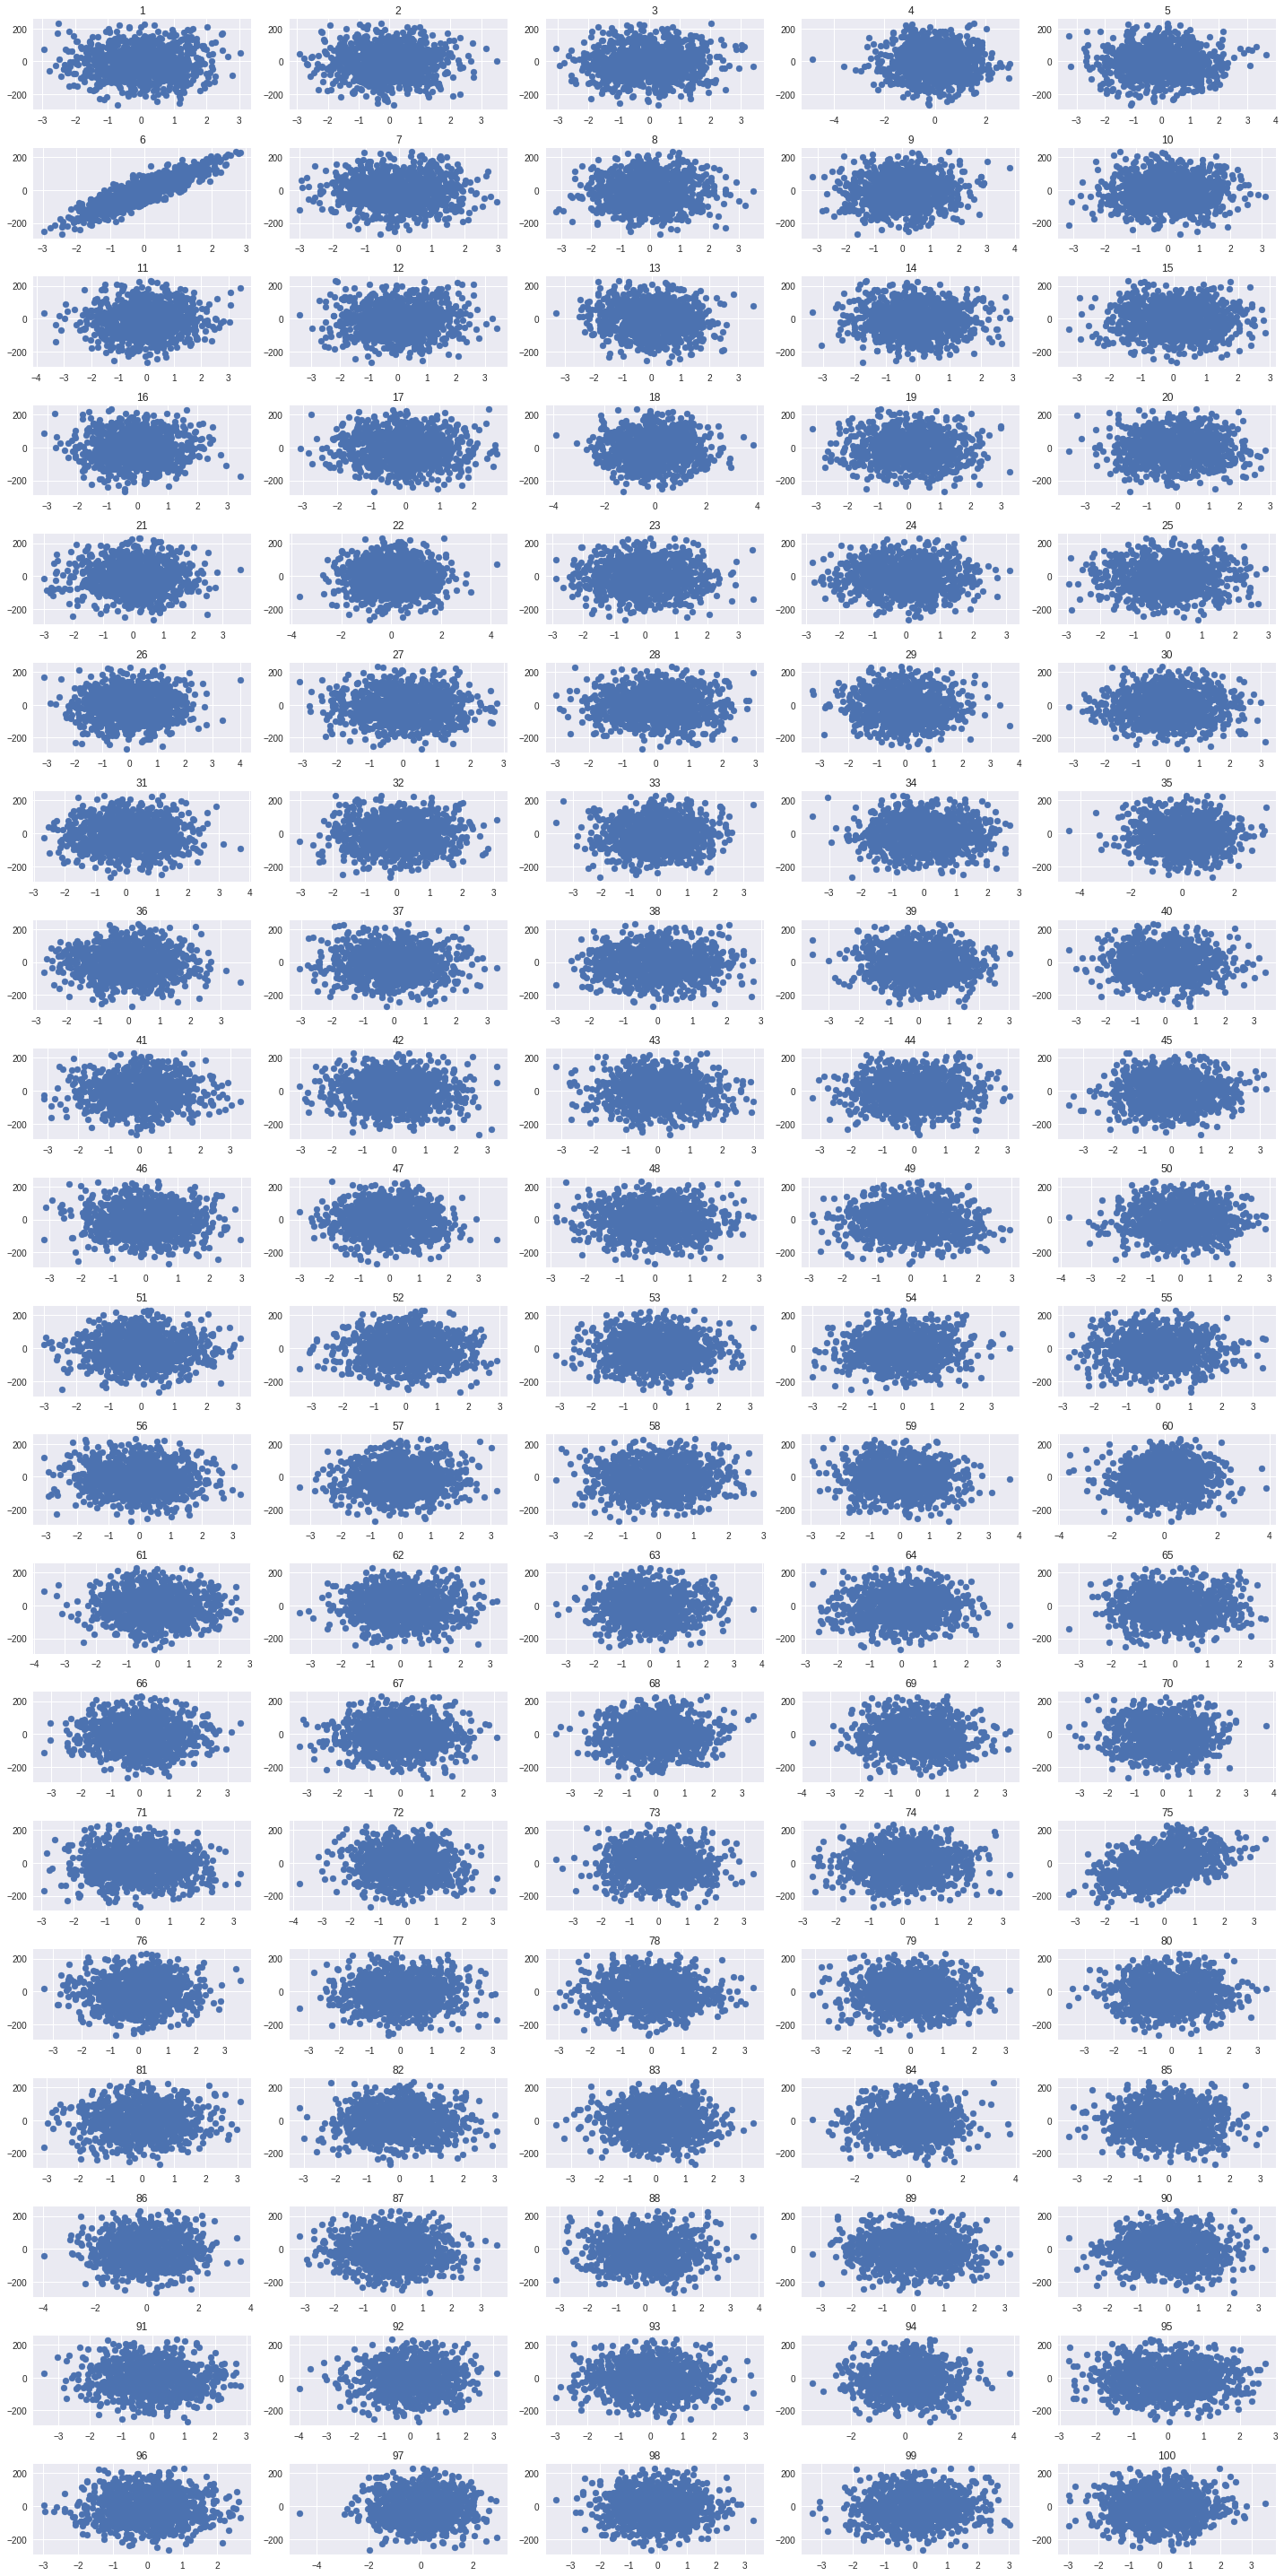

In [20]:
fig = plt.figure(1,figsize=(20,40))

for i in range(mr_X.shape[1]):

    fig.add_subplot(20,5,i+1)
    plt.scatter(mr_X[:,i], mr_y)
    plt.title(i+1)
    
fig.tight_layout()

## Comparing custom linear regression model to the one in scikit learn

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [22]:
from lib.models.Linear_Regression import Linear_Regression

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
sc = StandardScaler()

In [25]:
mr_X = sc.fit_transform(mr_X)

In [26]:
mr_X_tr, mr_X_ts, mr_y_tr, mr_y_ts = train_test_split(mr_X, mr_y)

#### Score comparison

It appears that the scikit-learn Linear_Regression model has some built method that affects the score and time performance. The second version of scoring done with MY_lr uses the ridge penalty for regularization. The model with regularization results in a similar accuracy score to the model in scikit-learn. 

With the make regression dataset the greater the signal to noise ratio the worse my model performs in comparison to the scikit-learn model. 

In [27]:
SCI_lr = LinearRegression(fit_intercept=True)
SCI_lr.fit(mr_X_tr, mr_y_tr)
SCI_lr.score(mr_X_ts, mr_y_ts)

0.99996566835311596

In [28]:
MY_lr = Linear_Regression()
MY_lr.fit(mr_X_tr, mr_y_tr)
MY_lr.score(mr_X_ts, mr_y_ts)

0.99996566835311607

In [29]:
MY_ridge = Linear_Regression()
MY_ridge.fit(mr_X_tr, mr_y_tr, reg=True, alpha=1)
MY_ridge.score(mr_X_ts, mr_y_ts)

0.99996045887540175

#### Time Comparison

In [30]:
%%timeit
SCI_lr = LinearRegression()
SCI_lr.fit(mr_X_tr, mr_y_tr)
SCI_lr.score(mr_X_ts, mr_y_ts)

9.18 ms ± 1.28 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [31]:
%%timeit
MY_lr = Linear_Regression()
MY_lr.fit(mr_X_tr, mr_y_tr)
MY_lr.score(mr_X_ts, mr_y_ts)

1.13 ms ± 40.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [33]:
%%timeit
MY_ridge = Linear_Regression()
MY_ridge.fit(mr_X_tr, mr_y_tr, reg=True, alpha=1)
MY_ridge.score(mr_X_ts, mr_y_ts)

1.57 ms ± 225 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
